In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/dados_tratados.csv")

In [3]:
df['bathrooms_text']

0        10.00
1        10.00
2        10.00
3        10.05
4        10.05
         ...  
24302    30.00
24303    10.00
24304    20.00
24305    10.00
24306    10.00
Name: bathrooms_text, Length: 24307, dtype: float64

In [4]:
def tabela_review(df):
    df_review = df[['id',
    'number_of_reviews',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month', 'price']]
    return df_review

In [5]:
def tabela_acomodacao(df):
    df_acomodacao = df[['id',
    'neighbourhood_cleansed',
    'distancia_parada_metros',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    'amenities',
    'price',
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value']]
    return df_acomodacao

In [6]:
df_acomodacao = tabela_acomodacao(df)

In [7]:
total_mordomias = []
for index, row in df_acomodacao.iterrows():
    total_mordomias.append(row['amenities'].count('"')/2)
df_acomodacao['total_mordomias'] = total_mordomias

C:\Users\victo\AppData\Local\Temp\ipykernel_16516\1224067199.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acomodacao['total_mordomias'] = total_mordomias


In [108]:
df_groupby_neighbourhood = df_acomodacao.groupby("neighbourhood_cleansed", as_index=False)["price"].mean()
fig = px.bar(df_groupby_neighbourhood, x='neighbourhood_cleansed', y='price')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [94]:
df_accommodates = df_acomodacao.groupby("accommodates", as_index=False)["price"].mean()
fig = px.bar(df_accommodates, x='accommodates', y='price')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [95]:
def analise_dados(df):
    df_cov=df[['distancia_parada_metros',
                'bathrooms_text',
                'bedrooms',
                'beds',
                'total_mordomias',
                'price']]
    
    df_roomtype = df.groupby("room_type", as_index=False)["price"].mean()
    fig = px.bar(df_roomtype, x='room_type', y='price')
    fig.update_xaxes(categoryorder='total descending')
    fig.show()
    menor_custo = df_roomtype.min()['room_type']
    df_menor_custo = df[df['room_type'] == menor_custo]
    df_fig_menor_custo = df_menor_custo.groupby("neighbourhood_cleansed", as_index=False)["price"].mean()
    fig2 = px.bar(df_fig_menor_custo, x='neighbourhood_cleansed', y='price')
    fig2.update_xaxes(categoryorder='total descending')
    fig2.show()
    sns.heatmap(df_cov.corr(), annot=True)

## Análise para viajantes sozinhos

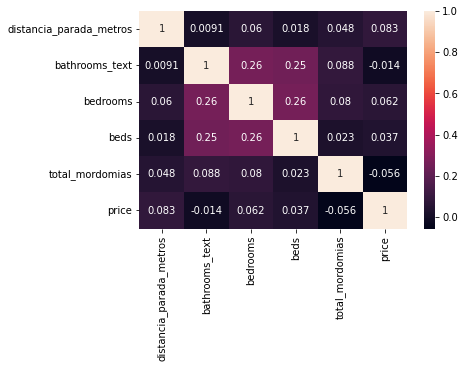

In [96]:
df_um = df_acomodacao[df_acomodacao['accommodates'] == 1]
analise_dados(df_um)

In [102]:
df_vargem = df_um[df_um['neighbourhood_cleansed'] == 'Vargem Pequena'].sort_values('price', ascending=False)

In [107]:
df_vargem['price'].mean()

1064.6666666666667

Aqui podemos ver que o menor custo se encontra para os quartos de hotéis, tendo a menor média entre eles.

Tendo isso em vista, agora vamos avaliar apenas os quartos de hotel para encontrar o melhor custo benefício

## Análise para casal de viajantes

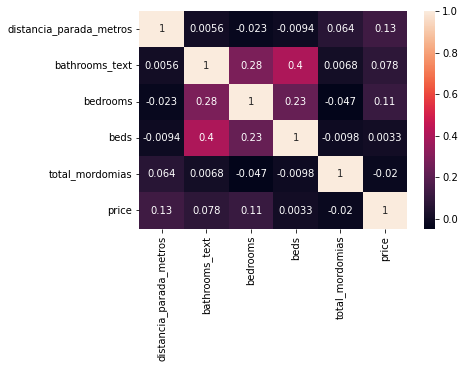

In [97]:
df_casal = df_acomodacao[df_acomodacao['accommodates'] == 2]
analise_dados(df_casal)

## Análise para familia de 3 viajantes

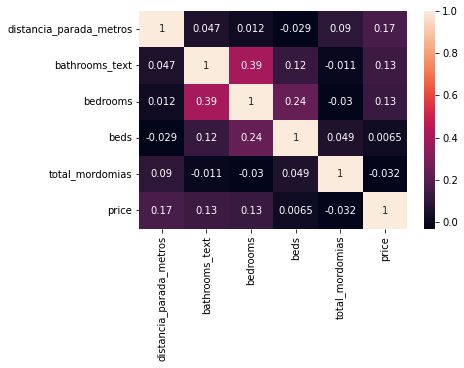

In [98]:
df_familia_pequena = df_acomodacao[df_acomodacao['accommodates'] == 3]
analise_dados(df_familia_pequena)

## Análise para Família média/grande

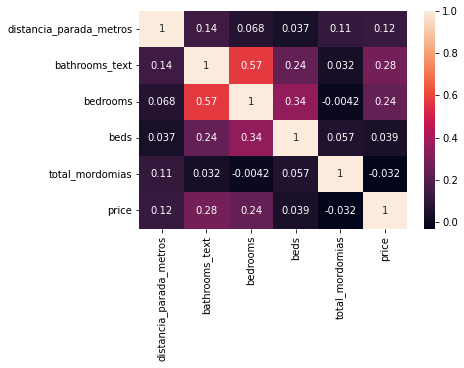

In [99]:
df_familia = df_acomodacao[(df_acomodacao['accommodates'] == 4) | (df_acomodacao['accommodates'] == 5)]
analise_dados(df_familia)